In [1]:
import numpy as np
import qnmfits.qnm as qnm

import matplotlib.pyplot as plt
import rcparams
plt.rcParams.update(rcparams.params)

from scipy.optimize import minimize

In [61]:
# G/c**3 (s/kg)
conversion = 2.477e-36

# Solar mass (kg)
M_sun = 2e30

In [43]:
def fun(chi, Q_star, l, m, n):
    
    omega = qnm.omega(l, m, n, 1, chi)
    f = np.real(omega)/(2*np.pi)
    tau = -1/np.imag(omega)
    Q = np.pi*f*tau
    
    return abs(Q_star - Q)

Measurement compatible with modes:
(2, 2, 0), chi = 0.974, Mf = 86.148 solar masses
(3, 2, 0), chi = 0.970, Mf = 102.647 solar masses
(3, 3, 0), chi = 0.932, Mf = 118.436 solar masses


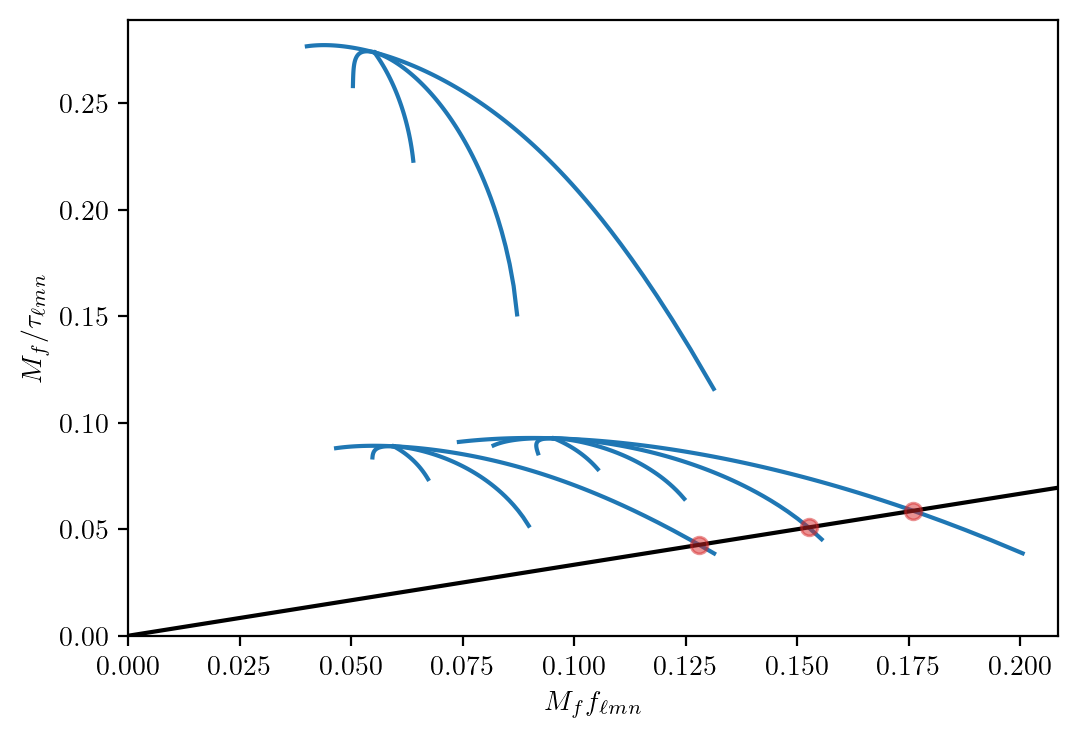

In [67]:
# Base plot
# ---------

fig, ax = plt.subplots(figsize=(6,4), dpi=200)

chi_array = np.arange(0, 0.99, 0.01)

for n in range(2):
    for l in range(2,4):
        
        if (l==3) & (n==1):
            pass
        
        else:
            for m in range(-l,l+1):
                
                # Evaluate the QNM frequencies
                frequencies = qnm.omega(l, m, n, 1, chi_array)
                        
                # Add to the figure
                ax.plot(
                    np.real(frequencies)/(2*np.pi), 
                    -np.imag(frequencies), 
                    c='C0'
                )

ax.set_xlabel('$M_ff_{\ell m n}$')
ax.set_ylabel('$M_f/ \\tau_{\ell m n}$')

ax.set_xlim(0)
ax.set_ylim(0)

# Add measurements
# ----------------

# The measured frequency and damping time
f_star = 300
tau_star = 0.01

# The quality factor
Q_star = np.pi*f_star*tau_star

# Add the line corresponding to the measurement
x = np.linspace(0, 1)
ax.plot(x, (np.pi/Q_star)*x, c='k')

# Identify points of intersection between the measurement and the Kerr 
# spectrum

intersected_modes = []
fitted_spins = []
fitted_masses = []

for n in range(2):
    for l in range(2,4):
        
        if (l==3) & (n==1):
            pass
        
        else:
            for m in range(-l,l+1):
                result = minimize(
                    fun, 
                    x0=0.5, 
                    args=(Q_star, l, m, n), 
                    bounds=[(0.,0.99)]
                )
                if result['fun']<1e-5:
                    
                    chi_fit = result['x'][0]
                    omega_fit = qnm.omega(l, m, n, 1, chi_fit)
                    
                    Mf_fit = (np.real(omega_fit)/(2*np.pi))/(f_star*conversion)
                    
                    intersected_modes.append((l,m,n))
                    fitted_spins.append(chi_fit)
                    fitted_masses.append(Mf_fit)
                    
                    ax.plot(
                        np.real(omega_fit)/(2*np.pi), 
                        -np.imag(omega_fit), 
                        'o', 
                        c='C3',
                        alpha=0.5
                    )
                    
print('Measurement compatible with modes:')
for mode, chi, Mf in zip(intersected_modes, fitted_spins, fitted_masses):
    print(f'{mode}, chi = {chi:.3f}, Mf = {Mf/M_sun:.3f} solar masses')